In [ ]:
import pandas as pd
import sklearn
#taller numero 2



Ajustar un modelo para el conjunto de datos. El conjunto de datos contiene información de una
población con la cual se intenta predecir si puede o no cobrar más de 50.000 dólares anuales.

In [8]:
columnas=['edad','clase_de_trabajo','cantidad_personas','educacion',
            'anios_de_estudio','estado_civil','ocupacion','relaciones','raza',
            'sexo','ganancia_capital','perdida_de_capital','horas_por_semana','pais','ganancia']
# Load the Census dataset
data = pd.read_csv("/home/usm/Descargas/Practica Arboles/datos/adult.data",names=columnas, na_values=['?'] )

display(data)


,edad,clase_de_trabajo,cantidad_personas,educacion,anios_de_estudio,estado_civil,ocupacion,relaciones,raza,sexo,ganancia_capital,perdida_de_capital,horas_por_semana,pais,ganancia
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [11]:

#datos faltantes
data=data.dropna(axis=0)
display(data.isnull().sum())

edad                  0
clase_de_trabajo      0
cantidad_personas     0
educacion             0
anios_de_estudio      0
estado_civil          0
ocupacion             0
relaciones            0
raza                  0
sexo                  0
ganancia_capital      0
perdida_de_capital    0
horas_por_semana      0
pais                  0
ganancia              0
dtype: int64

In [26]:
data_complete=data.drop(labels=['cantidad_personas'],axis=1)
#display(data_complete.describe())
#display(data_complete.corr())
#display(data_complete.dtypes)

#tamaño del conjunto de datos
n_records=len(data_complete)
n_most_50=len(data_complete[data_complete['ganancia']=='>50K'])
#n_most=len(data_complete['ganancia']=='<=50k')

print("total:",str(n_records))
print(">50",n_most_50)

total: 30162
>50 7508


In [31]:
#pasar las variables categoricas a dummies con funcion ya hecha
def function_dummies(df):
    df_dummies=df
    colnames=df.columns
    for c in colnames:
        if df[c].dtypes=='object':
            col=  pd.get_dummies(df[c])
            df_dummies[c+"_"+col.columns]=col
            df_dummies = df_dummies.drop(labels=[c],axis=1)
    return (df_dummies)

Y=data_complete['ganancia']
X=data_complete.drop(labels=['ganancia'],axis=1)
X_dummies=function_dummies(X)
#muestra los 5 primeros
display(X_dummies.head(5))
Y=Y.str.replace('<=50K','1')
Y=Y.replace('>50K','0')


,edad,anios_de_estudio,ganancia_capital,perdida_de_capital,horas_por_semana,clase_de_trabajo_Federal-gov,clase_de_trabajo_Local-gov,clase_de_trabajo_Private,clase_de_trabajo_Self-emp-inc,clase_de_trabajo_Self-emp-not-inc,...,pais_Portugal,pais_Puerto-Rico,pais_Scotland,pais_South,pais_Taiwan,pais_Thailand,pais_Trinadad&Tobago,pais_United-States,pais_Vietnam,pais_Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Separe las poblaciones en entrenamiento y validación en forma aleatoria en 70/30
(genere una semilla aleatoria e indique el valor de la semilla en el software que utilizó).
Indique que cantidad de casos quedaron para cada ambiente.

In [38]:
from sklearn.model_selection import train_test_split
#random_state=0 quiere decir que guarda el mismo conjunto aleatorio
#test_size da el 30% lo oculta para hacer pruebas y el 70% va hacer de validacion
X_train,X_test,y_train,y_test=train_test_split(X_dummies,Y,test_size=0.3,random_state=0)

print(">50 train", y_train[y_train=='1'].count())
print("<=50 train", y_train[y_train=='0'].count())

#print(">50 train", y_test[y_test=='1'].count())
#print("<=50 train", y_test[y_test=='0'].count())

>50 train 15890
<=50 train 5223


In [44]:
# Import train_test_split
from sklearn import tree
#arbol de 4 niveles max_depth=4
modelo=tree.DecisionTreeClassifier(max_depth=4,criterion='entropy')

#entrena la variable
modelo.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

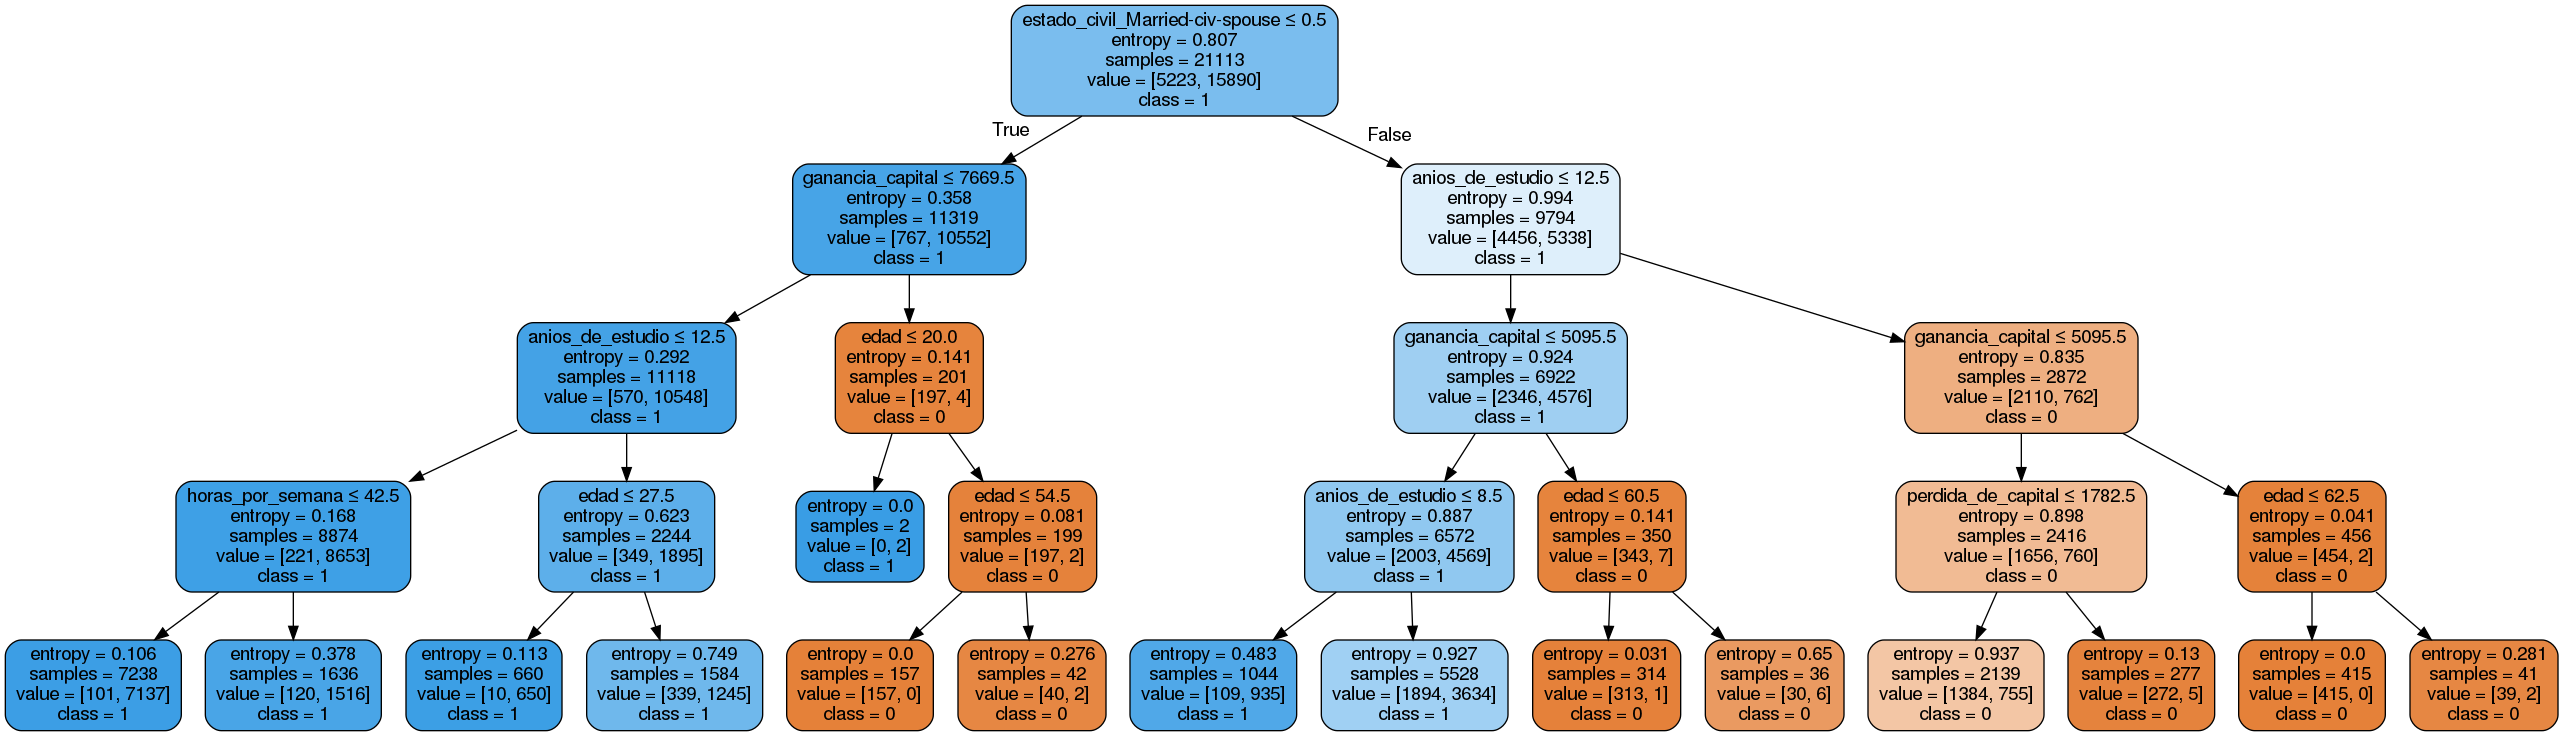

In [45]:
from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image 
#pip install graphviz
#pip install pydotplus
dot_data = StringIO()

feature_cols=X_train.columns
export_graphviz(modelo, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('arbol.png')
Image(graph.create_png())

Calcular la perfomarnce y el AUC y el gráfico ROC en entrenamiento y validación
indicando también el total de casos de cada una de las clases.

In [50]:
#Esta parte es para validar bajo la metrica
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score

#predict test
y_pred_test=modelo.predict(X_test)
#predict train
#Que tanto predice los datos que miro
y_pred_train=modelo.predict(X_train)

display('Test:',confusion_matrix(y_test,y_pred_test))
tn,fp,fn,tp=confusion_matrix(y_test,y_pred_test).ravel()
print("verdaderos positivos",tp)
print("verdadetos negativos",tn)
print("falsos positivos",fp)
print("falsos negativos",fn)
ac=(tp+tn)/(tp+tn+fn+fp)
print("performance", ac)

#forma resumida de lo anterior
print("accuracy test",accuracy_score(y_test,y_pred_test))
print("accuracy train",accuracy_score(y_train,y_pred_train))



'Test:'

array([[1178, 1107],
       [ 369, 6395]])

verdaderos positivos 6395
verdadetos negativos 1178
falsos positivos 1107
falsos negativos 369
performance 0.8368880539286109
accuracy test 0.8368880539286109
accuracy test 0.8416141713636148


In [58]:
#genera una matriz de 2*2 puesto que tiene 2 clases
probs_test= modelo.predict_proba(X_test)



data_set_test=X_test.copy()
display(data_set_test.head(5))

#va agregar una columna
data_set_test['predicho']=y_pred_test
data_set_test['predicho_prob_1']=probs_test[:,1]
data_set_test['predicho_prob_0']=probs_test[:,0]
data_set_test['real']=y_test

display(data_set_test.head(10))




,edad,anios_de_estudio,ganancia_capital,perdida_de_capital,horas_por_semana,clase_de_trabajo_Federal-gov,clase_de_trabajo_Local-gov,clase_de_trabajo_Private,clase_de_trabajo_Self-emp-inc,clase_de_trabajo_Self-emp-not-inc,...,pais_Portugal,pais_Puerto-Rico,pais_Scotland,pais_South,pais_Taiwan,pais_Thailand,pais_Trinadad&Tobago,pais_United-States,pais_Vietnam,pais_Yugoslavia
2135,44,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15639,21,10,0,0,20,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
29059,36,10,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
27523,30,11,0,0,49,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
9280,42,10,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


,edad,anios_de_estudio,ganancia_capital,perdida_de_capital,horas_por_semana,clase_de_trabajo_Federal-gov,clase_de_trabajo_Local-gov,clase_de_trabajo_Private,clase_de_trabajo_Self-emp-inc,clase_de_trabajo_Self-emp-not-inc,...,pais_Taiwan,pais_Thailand,pais_Trinadad&Tobago,pais_United-States,pais_Vietnam,pais_Yugoslavia,predicho,predicho_prob_1,predicho_prob_0,real
2135,44,9,0,0,40,0,0,1,0,0,...,0,0,0,1,0,0,1,0.986046,0.013954,1
15639,21,10,0,0,20,0,0,1,0,0,...,0,0,0,1,0,0,1,0.986046,0.013954,1
29059,36,10,0,0,40,0,0,1,0,0,...,0,0,0,1,0,0,1,0.657381,0.342619,1
27523,30,11,0,0,49,0,0,0,0,1,...,0,0,0,1,0,0,1,0.926650,0.073350,1
9280,42,10,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,1,0.657381,0.342619,1
21598,24,9,0,0,40,0,0,1,0,0,...,0,0,0,1,0,0,1,0.657381,0.342619,1
28780,21,10,0,0,40,0,1,0,0,0,...,0,0,0,1,0,0,1,0.986046,0.013954,1
13383,32,13,0,0,45,0,0,0,1,0,...,0,0,0,1,0,0,0,0.352969,0.647031,1
11015,35,9,0,0,60,0,0,1,0,0,...,0,0,0,1,0,0,1,0.657381,0.342619,0
3180,30,9,0,0,40,0,1,0,0,0,...,0,0,0,1,0,0,1,0.657381,0.342619,0


Selecciones el 25% de los individuos en el ambiente de validación de acuerdo a la
siguiente lógica. Entregue los resultados indicados:
a. Al azar e indique la cantidad de individuos que cobran más de 50.000 dólares.


In [60]:
X_test_75, X_25, y_test_75, y_25 = train_test_split(X_test, 
                                                    y_test, 
                                                    test_size = 0.25, 
                                                    random_state = 0)

print ("total 25%",y_25.count())
print(">50k test 25% azar",y_25[y_25=='1'].count())

total 25% 2263
>50k test 25% azar 1715


b. Utilizando el modelo desarrollado en el punto 1.1.2 e indique la cantidad de
individuos que cobran más de 50.000 dólares.

In [68]:
#usando modelo

y_25_modelo=data_set_test.sort_values(['predicho_prob_1'], ascending=[False])[1:y_25.count()]
print(">50k test 25% modelo",len(y_25_modelo[y_25_modelo['real'] == '1']))

>50k test 25% modelo 2216
